# <center><font color='#006666'>A/B test performed in a large online store</font></center>
<center><img src="store.jpg"> </center>

## Contents <a class="anchor" id="contents"></a>

* [Project description](#Project_description)
<p> </p> 
* [General information](#Part_GI)
    * [Conclusion](#Conclusion_GI)
<p> </p> 
* [Data pre-processing](#Part_DP)
    * [The Visits dataset](#Visits)
    * [The Orders dataset](#Orders)
    * [Conclusion](#Conclusion_DP)
<p> </p> 
* [Part 1. Prioritizing Hypotheses](#Part_1)
    * [Conclusion](#Conclusion_Part_1)
<p> </p> 
* [Part 2. A/B Test Analysis](#Part_2)
    * [Raw data](#Raw_data)
    * [Outliers](#Outliers)
    * [The statistical significance](#statistical_significance)
    * [Conclusion](#Conclusion_Part_2)
<p> </p> 
* [General Conclusion](#General_conclusion)

## Project description <a class="anchor" id="Project_description"></a>

At a large online store, the Marketing Department and Analyst have put together a list of hypotheses that can help increase revenue. In this study, we need to prioritize these hypotheses and analyze the results of the A/B test performed.

We have at our disposal a file **hypotheses_us.csv** which contains nine hypotheses for increasing the income of an online store. The results of the A/B test are recorded in the **orders_us.csv** and **visit_us.csv** files.

## General information<a class="anchor" id="Part_GI"></a>
[Go back to the Contents](#contents)

The first step here is looking at the content of the data files.

In [1]:
#packages for data manipulations
import pandas as pd
import numpy as np
#packages for data plotting
import matplotlib.pyplot as plt
#statistical package
import scipy.stats as stats

We have three datasets.

**The *Hypotheses* dataset:**

In [2]:
#data source
df_hypotheses = pd.read_csv("hypotheses_us.csv", sep=';')

#dataset structure
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


The file contains the following data:

**Hypotheses** — brief descriptions of the hypotheses<br>
**Reach** — user reach, on a scale of one to ten<br>
**Impact** — impact on users, on a scale of one to ten<br>
**Confidence** — confidence in the hypothesis, on a scale of one to ten<br>
**Effort** — the resources required to test a hypothesis, on a scale of one to ten.

In [3]:
#dataset content
df_hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


**The *Visits* dataset:**

In [4]:
#data source
df_visits = pd.read_csv("visits_us.csv", sep=',', dtype={'visits':'int'}
                        , parse_dates=['date'])

#dataset structure
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 1.3+ KB


The file contains the following data:

**date** — date of visit<br>
**group** — A/B test group<br>
**visits** — the number of visits on the date indicated for the respective A/B test group

In [5]:
#dataset content
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**The *Orders* dataset:**

In [6]:
#data source
df_orders_source =  pd.read_csv("orders_us.csv", sep=',', parse_dates=['date'])
#dataset structure
df_orders_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


The file contains the following data:

**transactionId** — order identifier<br>
**visitorId** — identifier of the user who placed the order<br>
**date** — date of the order <br>
**revenue** — order's revenue<br>
**group** — the A/B test group that the user belongs to

In [7]:
#dataset content
df_orders_source.sample(5)

,transactionId,visitorId,date,revenue,group
328,3263878605,3340403042,2019-08-28,140.2,A
901,3402467119,4256040402,2019-08-27,30.1,A
787,1348929396,2698944478,2019-08-07,15.8,A
596,3352388207,1938138695,2019-08-26,200.3,A
886,51443164,4278982564,2019-08-05,385.7,A


## Conclusion. <a class="anchor" id="Conclusion_GI"></a>

We have three datasets for hypothesis testing and A/B test results verification.

Datasets show data that does not contain underfined or missing values. The data content matches the description.
To optimize the analysis process, the data was converted to appropriate formats when loaded.<br>
The *Hypotheses* dataset does not require data preprocessing.

## Data pre-processing <a class="anchor" id="Part_DP"></a>
[Go back to the Contents](#contents)

In this step, let's look at the content of the datasets in more detail.

**The *Visits* dataset** <a class="anchor" id="Visits"></a>

In [8]:
#general statistic
df_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [9]:
#records for groups labeled A and B
df_visits['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

In [10]:
#observation period
print('Min date value:', df_visits['date'].min())
print('Max date value:', df_visits['date'].max())

Min date value: 2019-08-01 00:00:00
Max date value: 2019-08-31 00:00:00


In [11]:
#checking for the presence of the same dates for groups A and B
df1=df_visits.loc[(df_visits['group']=='A')]['date'].reset_index(drop=True)
df2=df_visits.loc[(df_visits['group']=='B')]['date'].reset_index(drop=True)
df1.equals(df2)

True

The *Visits* dataset contains the number of visits in groups A and B for the period from 2019-08-01 to 2019-08-31. Each group has entries for each day of the specified period.<br>
The number of visits varies from 361 to 770.

**Consider the *Orders* dataset.**<a class="anchor" id="Orders"></a>

In [12]:
#drop duplicates
df_orders_source.drop_duplicates(inplace=True)

In [13]:
#data intersection

#selection of visitors included in both groups
df_duplicates= df_orders_source.groupby('visitorId').agg({'group':'nunique'})
#two groups
df_duplicates= df_duplicates[df_duplicates['group']>1]
print('Number of visitors who belongs to both groups:', df_duplicates['group'].count())

Number of visitors who belongs to both groups: 58


This sample shows that we have 58 users who appeared in Group A and Group B. Since we cannot say which group the user should be in, we will remove doubles from the analysis.

In [14]:
#remove doubles
df_orders= df_orders_source[~df_orders_source['visitorId'].isin(df_duplicates.index)]

In [15]:
#records for groups labeled A and B
df_orders['group'].value_counts()

B    548
A    468
Name: group, dtype: int64

The sample size remained significant.

Let's look at the value of revenue.

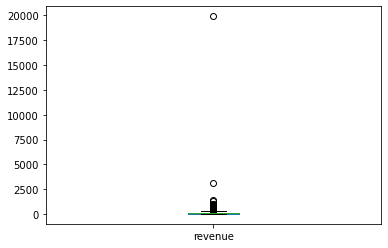

In [16]:
#distribution of data on a boxplot diagram
df_orders['revenue'].plot(kind='box');

We have a clear outlier in the sample. Let's get a look.

In [17]:
#check outliers
df_orders[df_orders['revenue']>5000]

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B


This outlier can affect the statistical significance of the results. Therefore, we will remove it.

In [18]:
df_orders= df_orders.drop(425).copy()

In [19]:
#statistic of the revenue values
df_orders['revenue'].describe()

count    1015.000000
mean      111.273695
std       183.898954
min         5.000000
25%        20.750000
50%        50.100000
75%       125.900000
max      3120.100000
Name: revenue, dtype: float64

In [20]:
#observation period
print('Min date value:', df_orders['date'].min())
print('Max date value:', df_orders['date'].max())

Min date value: 2019-08-01 00:00:00
Max date value: 2019-08-31 00:00:00


The *Orders* dataset contains the number of orders in groups A and B for the period from 2019-08-01 to 2019-08-31.<br> 
The final dataset contains 1015 records.

## Conclusion<a class="anchor" id="Conclusion_Part_DP"></a>

The data collection process is a complex task and has a number of problems. One of them is data pollution.<br>
In the results of our test, in the *Orders* dataset, there were 58 visitors who were included in both groups of A/B testing. When testing online stores, this can happen, for example, when the visitor uses different browsers or different login devices. Such values make the test invalid, so duplicates have been removed for further analysis. 
We've also removed the significant outlier revenue.

Summing up,
- we have a dataset with hypotheses, a dataset with data about visits and a dataset with orders
- we have data for the period from 2019-08-01 to 2019-08-31
- the data can be considered valid for further analysis.

## Part 1. Prioritizing Hypotheses<a class="anchor" id="Part_1"></a>
[Go back to the Contents](#contents)

We prioritize hypotheses to reduce experimentation costs and test only the most promising ideas.

There are nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.<br>
Let's apply the ICE framework to prioritize these hypotheses. 

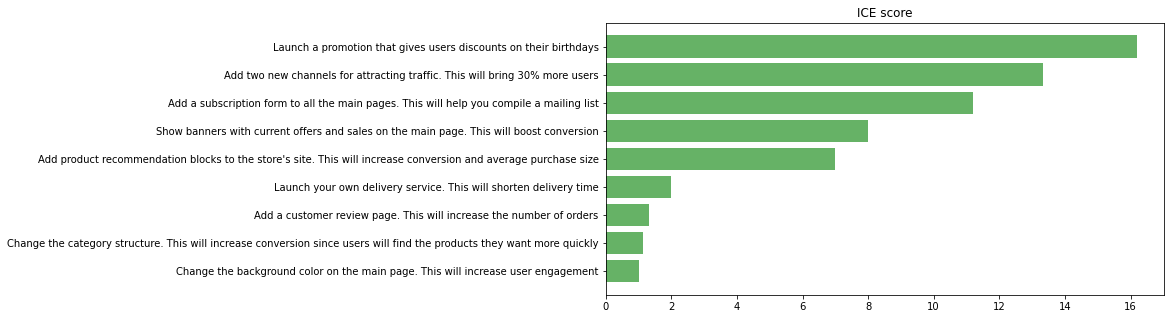

In [21]:
#ICE
df_hypotheses['ICE score']= df_hypotheses['Impact'] * df_hypotheses['Confidence'] / df_hypotheses['Effort']

#dataset for plotting
df = df_hypotheses[['Hypothesis','ICE score']].sort_values(by='ICE score')
#plotting
plt.figure(figsize=(10,5))
plt.title('ICE score')
plt.barh(df['Hypothesis'], df['ICE score'], color = "green", alpha = 0.6);

Let's apply the RICE framework to prioritize hypotheses.

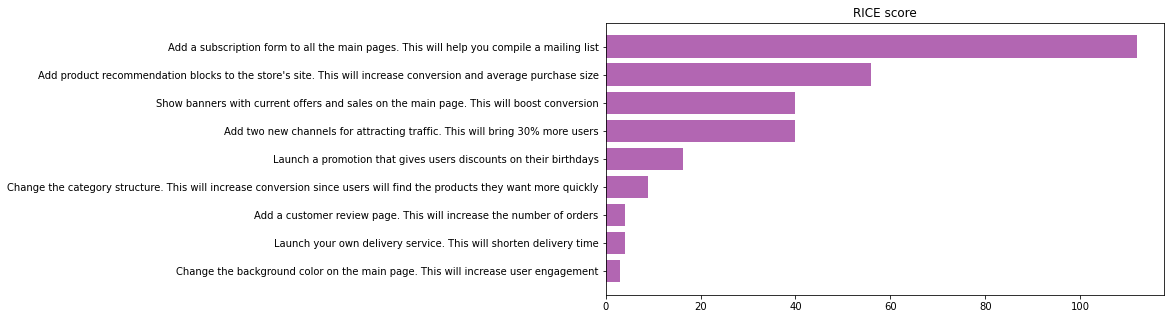

In [22]:
#RICE
df_hypotheses['RICE score']= (df_hypotheses['Reach'] * df_hypotheses['Impact'] * df_hypotheses['Confidence']
                              / df_hypotheses['Effort'])
#dataset for plotting
df = df_hypotheses[['Hypothesis','RICE score']].sort_values(by='RICE score').reset_index()
#plotting
plt.figure(figsize=(10,5))
plt.title('RICE score')
plt.barh(df['Hypothesis'], df['RICE score'], color = "purple", alpha = 0.6);

We have hypotheses that fall into the top five in both frameworks.

In [23]:
#the most significant hypotheses

#set the option to show the full content of the field Hypothesis
with pd.option_context('max_colwidth', -1):
    for i in range(1,6):
        print(str(i),' ', df['Hypothesis'][i+3])

1   Launch a promotion that gives users discounts on their birthdays
2   Add two new channels for attracting traffic. This will bring 30% more users
3   Show banners with current offers and sales on the main page. This will boost conversion
4   Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
5   Add a subscription form to all the main pages. This will help you compile a mailing list


## Conclusion <a class="anchor" id="Conclusion_Part_1"></a>

ICE and RICE can help immensely when deciding between hard-to-compare ideas. Both frameworks showed the most profitable changes for the online store. But the RICE score includes user reach metrics, which is the most important for our type of business. Therefore, the recommended hypothesis would be:

"Add a subscription form to all the main pages. This will help you compile a mailing list"

## Part 2. A/B Test Analysis <a class="anchor" id="Part_2"></a>
[Go back to the Contents](#contents)

In this part, we will check the test results.
To prevent the peeking problem, analysts examine graphs with cumulative indicators. According to the central limit theorem, the values of cumulative exponents often converge and are set around a certain average value. Then a graph of cumulative scores will help us decide whether to continue with the test.

### Raw data <a class="anchor" id="Raw_data"></a>

**- Graph cumulative revenue by group.**

Let's collect a dataset with cumulative data.

In [24]:
# building an array with unique paired date-group values
datesGroups = df_orders[['date','group']].drop_duplicates()

# getting aggregated cumulative daily data on orders 
ordersAggregated = datesGroups.apply(
    lambda x: df_orders[np.logical_and( df_orders['date'] <= x['date']
                                      , df_orders['group'] == x['group'])
                    ].agg({'date':'max', 'group':'max', 
                           'transactionId':'nunique', 'visitorId':'nunique', 
                           'revenue':'sum'}
                         ), axis=1).sort_values(by=['date','group'])

#getting aggregated cumulative daily data on visitors  
visitorsAggregated = datesGroups.apply(
    lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], 
                                       df_visits['group'] == x['group'])
                         ].agg({'date':'max', 'group':'max', 'visits':'sum'}
                              ), axis=1).sort_values(by=['date','group'])

#merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, 
                                        left_on=['date', 'group'], right_on=['date', 'group'])
#rename columns
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Separation of groups by different datasets.

In [25]:
# DataFrame with cumulative orders and cumulative revenue by day, Group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
 
# DataFrame with cumulative orders and cumulative revenue by day, Group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Graphical representation of cumulative revenue.

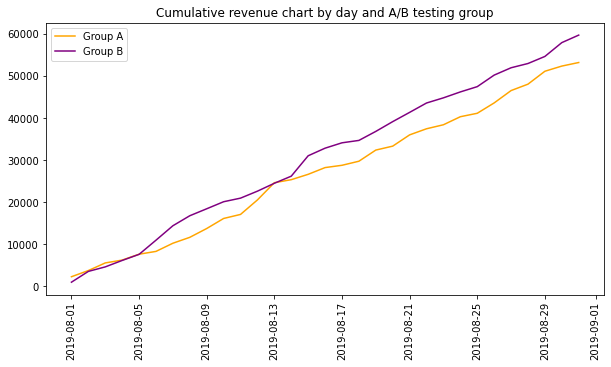

In [26]:
plt.figure(figsize=(10,5))
# Plotting the Group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Group A', color='orange')

# Plotting the Group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Group B', color='purple')

plt.title('Cumulative revenue chart by day and A/B testing group')
plt.xticks(rotation='vertical'); plt.legend();

The data distribution plots show a uniform increase in values for both groups. Since the beginning of the testing period, fluctuations in values are noticeable, but since the second week of the test, the graphs have come to a symmetrical state. The aggregate data of Group A is significantly lower for almost the entire period.

**- Graph cumulative average order income by groups.**

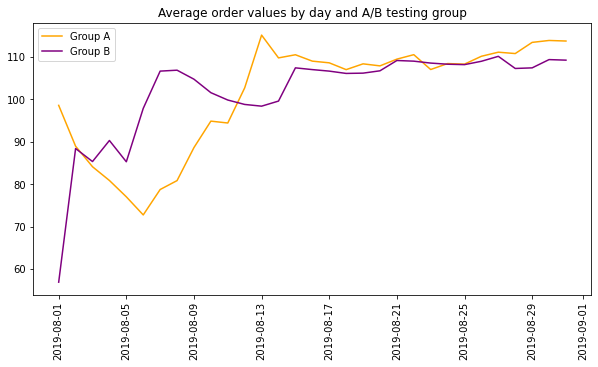

In [27]:
plt.figure(figsize=(10,5))
#average order value by Group A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders']
         , label='Group A', color='orange')
#average order value by Group B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders']
         , label='Group B', color='purple')
#graph settings
plt.title('Average order values by day and A/B testing group')
plt.xticks(rotation='vertical'); plt.legend();

At the beginning of the period, we see noticeable jumps in the average order value, and in opposite directions by group. This is especially noticeable in Group A. Perhaps there are significant outliers at the beginning of the period. Starting from the second week of the period, the data stabilized and the graphs of the groups practically coincide. At the very end, the advantage of Group A.

**- Graph the relative difference in cumulative average order value for Group B compared with Group A.**

In [28]:
#gathering data into one dataset
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB
                                                   , left_on='date', right_on='date', how='left'
                                                   , suffixes=['A', 'B'])

Graphical representation of the relative difference.

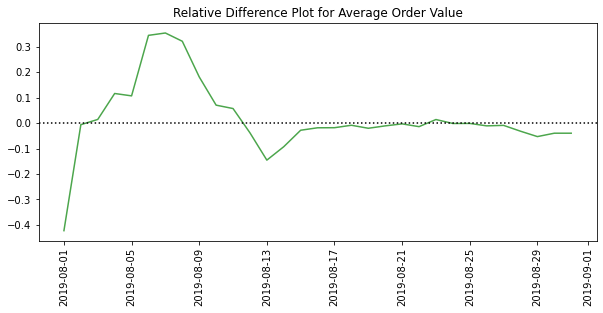

In [29]:
plt.figure(figsize=(10,4)) 
#plotting a relative difference graph for the average order value
plt.plot(mergedCumulativeRevenue['date'],
           (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) /
            (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA']
           )-1 #minus 1 will give a distribution around y=0
         , color='green', alpha=.7)
 
#y=0 line
plt.axhline(y=0, color='black', linestyle=':');
plt.title('Relative Difference Plot for Average Order Value')
plt.xticks(rotation='vertical');

In the first two weeks of the period, the chart has noticeable jumps. There are possibly influential outliers, which we will check below.<br>
Then the relative difference between groups A and B stabilizes and becomes insignificant. At the end of the period, group A shows the best values.

**- Calculate each group's conversion rate as the ratio of orders to the number of visits for each day.**

In [30]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
 
# selecting data on Group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
 
# selecting data on Group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

 Plot the daily conversion rates of the two groups.

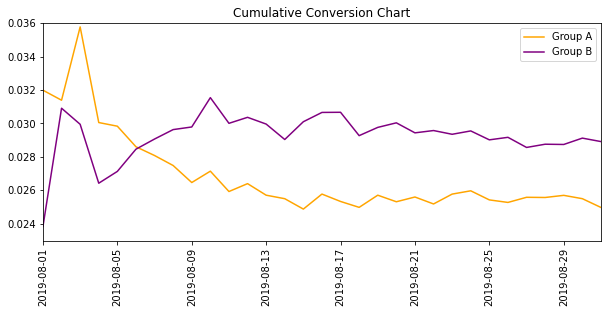

In [31]:
#plotting the graphs
plt.figure(figsize=(10,4)) 
#Group A
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Group A', color='orange')
#Group B
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Group B', color='purple')
plt.title('Cumulative Conversion Chart')
plt.xticks(rotation='vertical'); plt.legend();
 
#setting the axes' scale
#plt.axis(xmin, xmax, ymin, ymax)
plt.axis(['2019-08-01', '2019-08-31', 0.023, 0.036]);

Conversion rates have similar spikes in Group A and Group B. Then we see a decrease in conversion rate for Group A and an increase in conversion rate for Group B. Results stabilized towards the end of the period. Group B showed clearly the best results.

Let's see the relative difference.

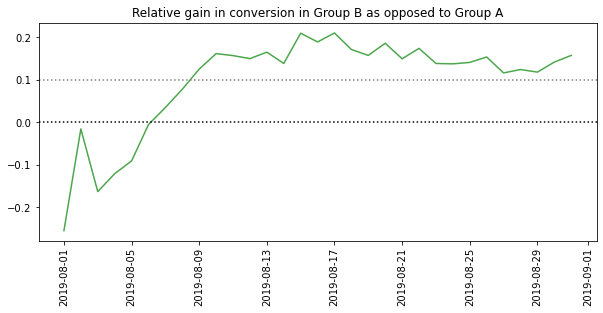

In [32]:
#collect data to a dataset
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']].merge
                               (cumulativeDataB[['date','conversion']],
                                left_on='date', right_on='date', how='left', suffixes=['A', 'B']) )
#plotting
plt.figure(figsize=(10,4)) 
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
        , color='green', alpha=.7)
plt.title('Relative gain in conversion in Group B as opposed to Group A')
plt.xticks(rotation='vertical'); 
#y=0 line 
plt.axhline(y=0, color='black', linestyle=':')
#y=0.1 line
plt.axhline(y=0.1, color='grey', linestyle=':');

The graph shows a steady increase in conversions in Group B compared to Group A.

Overall, the conversion rate is stable. However, we have seen anomalies in the graphs above. Let's look at the presence of outliers, they can change the distribution of data.

### Outliers <a class="anchor" id="Outliers"></a>

[Go back to the Contents](#contents)

We want to identify outliers: 
- in the number of orders per user
- in the cost of orders


**- Plot a scatter chart of the number of orders per user.**

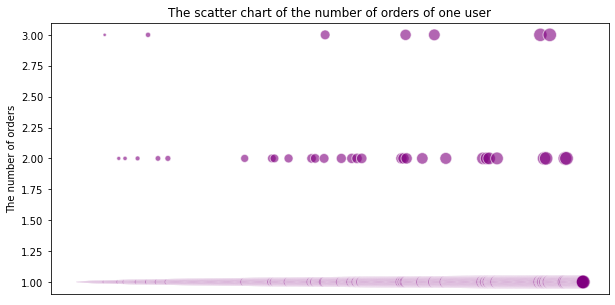

In [33]:
#group orders by visitors
ordersByUsers = df_orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
ordersByUsers.columns = ['Visitors','The number of orders']

#plotting a scatter graph
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0,len(ordersByUsers)))
#scatter
plt.scatter(x_values, ordersByUsers['The number of orders'], s=x_values*0.2, color='purple', alpha=.6,
           linewidth=1, edgecolors='white')
plt.title('The scatter chart of the number of orders of one user')
plt.xticks([])
plt.ylabel('The number of orders');

During the test, users made 1 to 3 purchases in the store. The purchases are distributed over time and their number is not abnormal, which means that we cannot say that these are outliers.

However, let's look at the distribution of values. Percentiles are a great tool to use when you need to know a distribution of values.

**- Calculate the 95th and 99th percentiles for the number of orders per user.**

In [34]:
print(np.percentile(ordersByUsers['The number of orders'], [95, 99]))

[1. 2.]


At least 95% of users placed just one order and less than 1% of users made three orders.

Thus, in this sample there are no abnormal outliers in the number of orders per user.

**- Plot a scatter chart of order prices.**

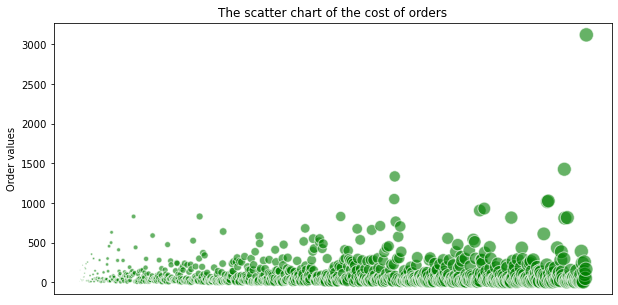

In [35]:
#"Orders" dataset
plt.figure(figsize=(10,5))
x_values = pd.Series(range(0,len(df_orders['revenue'])))
#scatter
plt.scatter(x_values, df_orders['revenue'], s=x_values*0.2, color='green', alpha=.6,
           linewidth=1, edgecolors='white')
plt.title('The scatter chart of the cost of orders')
plt.xticks([]); plt.ylabel('Order values');

We see a number of values with a price of 1000 and above. The obvious outlier is 3000.<br>
Let's see the range of values.

**- Calculate the 95th and 99th percentiles of order prices.**

Percentiles indicate the percentage of values that fall below a particular value. 

In [36]:
print(np.percentile(df_orders['revenue'], [95, 99]))

[410.5  828.27]


The nature of the price parameter is characterized by a large scatter of data and a shift in the distribution of data upward. Therefore, it makes sense to limit the sample to obtain statistically significant results.<br>
In our sample, at least 95% of users placed orders up to 410.5. Therefore, when reducing the sample, we take 410.5 as the upper limit, which means 95% of users.

### The statistical significance<a class="anchor" id="statistical_significance"></a>

[Go back to the Contents](#contents)

Let's compare raw data and reduced data. 

**- Find the statistical significance of the difference in conversion between the groups using the raw data.**

In [37]:
#dividing users with orders into groups

#Group A
ordersByUsersA = df_orders[df_orders['group']=='A'
                       ].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
#rename columns
ordersByUsersA.columns = ['userId', 'orders']
#Group B
ordersByUsersB = df_orders[df_orders['group']=='B'
                       ].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
#rename columns
ordersByUsersB.columns = ['userId', 'orders']

Combining users with and without orders.

In [38]:
#Group A
#orders and visitors
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - 
                                                  len(ordersByUsersA['orders'])), 
                               name='orders')]
                    ,axis=0)
#Group B
#orders and visitors
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - 
                                                  len(ordersByUsersB['orders'])), 
                               name='orders')]
                    ,axis=0)

*The difference in a conversion.*<br>
Hereinafter, we will test the hypothesis that the compared independent samples belong to one general population using the nonparametric Mann-Whitney U-test.

H₀ - there is no difference between the distributions of the data samples<br>
The significant level alpha is set equal to 0.05

In [39]:
#the p-value
#sampling on the orders of visitors
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

p-value: 0.006


p-value <= alpha: reject H₀<br>
The p-value strongly suggests that the sample distributions are different. That is, order conversion differs between groups.

In [40]:
#the relative difference in the average conversion for group B 
print("the relative difference: {:.1%}".format(sampleB.mean()/sampleA.mean()-1))

the relative difference: 15.8%


The relative difference in conversion gain for Group B compared with Group A is 15.8% Group B order conversion is higher.

**- Find the statistical significance of the difference in average order cost between the groups using the raw data.**

*The difference in an average order value.*

H₀ - there is no difference between the distributions of the data samples<br>
The significant level alpha is set equal to 0.05

In [41]:
#the p-value
#sampling on the revenue of orders
print("p-value: {0:.3f}".format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'],
                                                   df_orders[df_orders['group']=='B']['revenue'])[1]))

p-value: 0.411


p-value > alpha: fail to reject H₀<br>
Sample distributions are equal. Which means that the order value does not differ between groups.

In [42]:
#the relative difference in average order value between groups
print("the relative difference: {:.1%}".format(df_orders[df_orders['group']=='B']['revenue'].mean()/
                                               df_orders[df_orders['group']=='A']['revenue'].mean()-1))

the relative difference: -4.0%


However, the average order value for Group B is 4% less than for Group A.

**- Find the statistical significance of the difference in conversion between the groups using the filtered data.**

Analyzing the data above, we have taken 410.5 as the upper limit for revenue.

In [43]:
#the total number of abnormal users

#reduce the revenue
abnormalUsers = df_orders[df_orders['revenue'] > 410.5]['visitorId'].drop_duplicates()

print('Number of abnormal values:', abnormalUsers.count())

Number of abnormal values: 50


Removing the anomalous visitors.

In [44]:
#Group A
sampleAFiltered= pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - 
                                                          len(ordersByUsersA['orders'])),name='orders')]
                           ,axis=0)
#Group B 
sampleBFiltered= pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - 
                                                          len(ordersByUsersB['orders'])),name='orders')]
                           ,axis=0)

Applying the Mann-Whitney statistical test to the resulting samples.

*The difference in the conversion rate in the filtered groups.*<br>
H₀ - there is no difference between the distributions of the data samples<br>
The significant level alpha = 0.05

In [45]:
#the p-value
#sampling on the orders of visitors
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

p-value: 0.008


p-value <= alpha: reject H₀<br>
That is, the conversion rate differs between filtered groups, the same as for groups of raw data.

Let's calculate the statistical significance of the difference in conversion.

In [46]:
#Print group B's relative gain
print("the relative difference: {:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

the relative difference: 15.6%


In the filtered data, in Group B, the conversion is also higher than in Group A. Here, too, the difference between filtered data and raw data is negligible.

**- Find the statistical significance of the difference in average order cost between the groups using the filtered data.**

*The difference in the average order value in the filtered groups.*<br>
H₀ - there is no difference between the distributions of the data samples<br>
The significant level alpha = 0.05

In [47]:
#the p-value
#sampling on the revenue of orders
print("p-value: {0:.3f}".format(stats.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

p-value: 0.388


p-value > alpha: fail to reject H₀<br>
Sample distributions are equal. This means that the value of the order in different groups does not differ for the filtered data as well.

In [48]:
#the relative difference in average order value between groups
print("the relative difference: {:.1%}".format(
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

the relative difference: -5.2%


Even in the filtered data, the average order value for Group B is 5.2% less than for Group A.

## Conclusion <a class="anchor" id="Conclusion_Part_2"></a>

Summarizing the results of the second part of the analysis:
- The graph of the difference in conversion rates between groups shows that the results of Group B are significantly higher than that of Group A (more than 10% starting from the middle of the period under review)
- The graph of the difference in average order value between groups tells us that since the end of the period under review the results of Group B were almost the same as in Group A and even slightly less.
- In both raw and filtered data, there is a statistically significant difference in conversion rates between groups. The conversion of Group B is higher than the conversion of Group A.
- Neither raw nor filtered data showed statistically significant differences in order value between groups. The order cost is the same for both groups. However, it should be noted that the average order value for Group B is less than for Group A.

## General conclusion <a class="anchor" id="General_conclusion"></a>
[Go back to the Contents](#contents)

Based on these facts, it can be concluded that the test was successful and should be stopped. Group B showed the best conversion rates. This will help the online store to build a mailing list.